## Project Repository

[Repository Link](https://github.com/Tinny98/Lane-Detection-in-Autonomous-Vehicles.git)

- This repository contains all the necessary code that I worked on and it also contains the dataset annotated.

-  The cells are run sequentially.


In [1]:
!git clone https://github.com/Tinny98/Lane-Detection-in-Autonomous-Vehicles.git

Cloning into 'Lane-Detection-in-Autonomous-Vehicles'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 58 (delta 10), reused 41 (delta 7), pack-reused 14 (from 1)
Receiving objects: 100% (58/58), 91.45 MiB | 16.91 MiB/s, done.
Resolving deltas: 100% (11/11), done.


## Install the Requirements

- Installing the requirements
- After Installing dependencies, Restart the runtime. If you do not restart the runtime, the python will throw "module not found error"

In [2]:
!pip install -r Lane-Detection-in-Autonomous-Vehicles/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 21.0 MB/s eta 0:00:00

## Copy Dataset from the Github Project Repository

- Since the project contains dataset.zip in datasets folder in the repository. copy that zip file to root

In [1]:
!cp Lane-Detection-in-Autonomous-Vehicles/datasets/dataset.zip ./

## Unziping the file

In [2]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/test/
   creating: dataset/test/images/
  inflating: dataset/test/images/road_image_160.png  
  inflating: dataset/test/images/road_image_161.png  
  inflating: dataset/test/images/road_image_162.png  
  inflating: dataset/test/images/road_image_163.png  
  inflating: dataset/test/images/road_image_164.png  
  inflating: dataset/test/images/road_image_165.png  
  inflating: dataset/test/images/road_image_166.png  
  inflating: dataset/test/images/road_image_167.png  
  inflating: dataset/test/images/road_image_168.png  
  inflating: dataset/test/images/road_image_169.png  
  inflating: dataset/test/images/road_image_170.png  
  inflating: dataset/test/images/road_image_171.png  
  inflating: dataset/test/images/road_image_172.png  
  inflating: dataset/test/images/road_image_173.png  
  inflating: dataset/test/images/road_image_174.png  
  inflating: dataset/test/images/road_image_175.png  
  inflating: dataset/test/images/road_image_176.png  

## Import the required libraries

In [3]:
import torch
import cv2
import torch.utils.data
import torchvision.transforms as transforms
import numpy as np
import os
import random
import math
from matplotlib import pyplot as plt
import torch.nn as nn

## Creating Image transformation functions

In [4]:
# HSV (Hue, Saturation, Value) Color Augmentation
def augment_hsv(img, hgain=0.015, sgain=0.7, vgain=0.4):
    """
    Augments the hue, saturation, and value (HSV) of an image.
    Parameters:
    img (numpy.ndarray): Input image in BGR format.
    hgain (float): Gain factor for hue adjustment. Default is 0.015.
    sgain (float): Gain factor for saturation adjustment. Default is 0.7.
    vgain (float): Gain factor for value adjustment. Default is 0.4.
    Returns:
    None: The function modifies the input image in place.
    """
    """change color hue, saturation, value"""
    r = np.random.uniform(-1, 1, 3) * [hgain, sgain, vgain] + 1  # random gains
    hue, sat, val = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
    dtype = img.dtype  # uint8

    x = np.arange(0, 256, dtype=np.int16)
    lut_hue = ((x * r[0]) % 180).astype(dtype)
    lut_sat = np.clip(x * r[1], 0, 255).astype(dtype)
    lut_val = np.clip(x * r[2], 0, 255).astype(dtype)

    img_hsv = cv2.merge((cv2.LUT(hue, lut_hue), cv2.LUT(sat, lut_sat), cv2.LUT(val, lut_val))).astype(dtype)
    cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR, dst=img)  # no return needed

# Random Perspective Transformation
def random_perspective(combination, degrees=10, translate=.1, scale=.1, shear=10, perspective=0.0, border=(0, 0)):
    """
    Apply a random perspective transformation to a combination of images.
    Parameters:
    combination (tuple): A tuple containing three images (img, gray, line) to be transformed.
    degrees (float): Maximum rotation angle in degrees. Default is 10.
    translate (float): Maximum translation as a fraction of image dimensions. Default is 0.1.
    scale (float): Scaling factor range. Default is 0.1.
    shear (float): Maximum shear angle in degrees. Default is 10.
    perspective (float): Perspective distortion factor. Default is 0.0.
    border (tuple): Border size (top, bottom) to add to the image. Default is (0, 0).
    Returns:
    tuple: A tuple containing the transformed images (img, gray, line).
    """
    """combination of img transform"""
    img, gray, line = combination
    height = img.shape[0] + border[0] * 2  # shape(h,w,c)
    width = img.shape[1] + border[1] * 2

    # Center
    C = np.eye(3)
    C[0, 2] = -img.shape[1] / 2  # x translation (pixels)
    C[1, 2] = -img.shape[0] / 2  # y translation (pixels)

    # Perspective
    P = np.eye(3)
    P[2, 0] = random.uniform(-perspective, perspective)  # x perspective (about y)
    P[2, 1] = random.uniform(-perspective, perspective)  # y perspective (about x)

    # Rotation and Scale
    R = np.eye(3)
    a = random.uniform(-degrees, degrees)
    s = random.uniform(1 - scale, 1 + scale)
    R[:2] = cv2.getRotationMatrix2D(angle=a, center=(0, 0), scale=s)

    # Shear
    S = np.eye(3)
    S[0, 1] = math.tan(random.uniform(-shear, shear) * math.pi / 180)  # x shear (deg)
    S[1, 0] = math.tan(random.uniform(-shear, shear) * math.pi / 180)  # y shear (deg)

    # Translation
    T = np.eye(3)
    T[0, 2] = random.uniform(0.5 - translate, 0.5 + translate) * width  # x translation (pixels)
    T[1, 2] = random.uniform(0.5 - translate, 0.5 + translate) * height  # y translation (pixels)

    # Combined rotation matrix
    M = T @ S @ R @ P @ C  # order of operations (right to left)
    if (border[0] != 0) or (border[1] != 0) or (M != np.eye(3)).any():  # image changed
        if perspective:
            img = cv2.warpPerspective(img, M, dsize=(width, height), borderValue=(114, 114, 114))
            gray = cv2.warpPerspective(gray, M, dsize=(width, height), borderValue=0)
            line = cv2.warpPerspective(line, M, dsize=(width, height), borderValue=0)
        else:  # affine
            img = cv2.warpAffine(img, M[:2], dsize=(width, height), borderValue=(114, 114, 114))
            gray = cv2.warpAffine(gray, M[:2], dsize=(width, height), borderValue=0)
            line = cv2.warpAffine(line, M[:2], dsize=(width, height), borderValue=0)

    combination = (img, gray, line)
    return combination

## Custom Dataset Class

- Modified class to point to location or path in the google colab location


In [7]:
class MyDataset(torch.utils.data.Dataset):
  """
  MyDataset is a custom dataset class for loading and transforming images and their corresponding labels for lane detection.
  Attributes:
      transform (callable, optional): A function/transform to apply to the images.
      Tensor (callable): A function to convert images to PyTorch tensors.
      valid (bool): Flag to indicate if the dataset is for validation.
      root (str): Root directory of the dataset.
      names (list): List of image file names in the dataset.
  Methods:
      __init__(self, transform=None, valid=False, test=False):
          Initializes the dataset with optional transformations and dataset type (train, validation, or test).
      __len__(self):
          Returns the number of images in the dataset.
      __getitem__(self, idx):
          Retrieves the image and corresponding labels at the specified index, applies transformations, and returns them.
  """

  def __init__(self, transform=None, valid=False, test=False):


      '''
      :param imList: image list (Note that these lists have been processed and pickled using the loadData.py)
      :param labelList: label list (Note that these lists have been processed and pickled using the loadData.py)
      :param transform: Type of transformation. See Transforms.py for supported transformations
      '''

      self.transform = transform
      self.Tensor = transforms.ToTensor()
      self.valid=valid
      if valid:
          self.root='dataset/validation/images'
          self.names=os.listdir(self.root)
      elif test:
          self.root='dataset/test/images'
          self.names=os.listdir(self.root)
      else:
          self.root='dataset/train/images/'
          self.names=os.listdir(self.root)

  def __len__(self):
      return len(self.names)

  def __getitem__(self, idx):
      '''

      :param idx: Index of the image file
      :return: returns the image and corresponding label file.
      '''
      W_=640
      H_=360
      image_name=os.path.join(self.root,self.names[idx])

      image = cv2.imread(image_name)
      original_image = cv2.imread(image_name)
      label1 = cv2.imread(image_name.replace("images","segments").replace("jpg","png"), 0)
      label2 = cv2.imread(image_name.replace("images","lane").replace("jpg","png"), 0)
      if not self.valid:
          if random.random()<0.5:
              combination = (image, label1, label2)
              (image, label1, label2)= random_perspective(
                  combination=combination,
                  degrees=10,
                  translate=0.1,
                  scale=0.25,
                  shear=0.0
              )
          if random.random()<0.5:
              augment_hsv(image)
          if random.random() < 0.5:
              image = np.fliplr(image)
              label1 = np.fliplr(label1)
              label2 = np.fliplr(label2)

      label1 = cv2.resize(label1, (W_, H_))
      label2 = cv2.resize(label2, (W_, H_))
      image = cv2.resize(image, (W_, H_))

      _,seg_b1 = cv2.threshold(label1,1,255,cv2.THRESH_BINARY_INV)
      _,seg_b2 = cv2.threshold(label2,1,255,cv2.THRESH_BINARY_INV)
      _,seg1 = cv2.threshold(label1,1,255,cv2.THRESH_BINARY)
      _,seg2 = cv2.threshold(label2,1,255,cv2.THRESH_BINARY)

      seg1 = self.Tensor(seg1)
      seg2 = self.Tensor(seg2)
      seg_b1 = self.Tensor(seg_b1)
      seg_b2 = self.Tensor(seg_b2)
      seg_da = torch.stack((seg_b1[0], seg1[0]),0)
      seg_ll = torch.stack((seg_b2[0], seg2[0]),0)
      image = image[:, :, ::-1].transpose(2, 0, 1)
      image = np.ascontiguousarray(image)

      return original_image, image_name,torch.from_numpy(image),(seg_da,seg_ll)

## Intialize a dataloader

- Intialize a dataloader with batch size 8

- Intialize train, test, validation datasets.

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(MyDataset(), batch_size = 8, shuffle = True)
test_dataloader = DataLoader(MyDataset(test=True), batch_size = 8, shuffle = True)
val_dataloader = DataLoader(MyDataset(valid=True), batch_size = 8, shuffle = True)

## Display images

- Show first sample of each mini-batch with size 8

dataset/train/images/road_image_47.png
dataset/train/images/road_image_103.png
dataset/train/images/road_image_151.png
dataset/train/images/road_image_101.png
dataset/train/images/road_image_31.png
dataset/train/images/road_image_12.png
dataset/train/images/road_image_37.png
dataset/train/images/road_image_65.png
dataset/train/images/road_image_99.png
dataset/train/images/road_image_50.png
dataset/train/images/road_image_105.png
dataset/train/images/road_image_16.png
dataset/train/images/road_image_78.png
dataset/train/images/road_image_125.png
dataset/train/images/road_image_58.png
dataset/train/images/road_image_42.png
dataset/train/images/road_image_86.png
dataset/train/images/road_image_134.png
dataset/train/images/road_image_157.png
dataset/train/images/road_image_110.png


<Figure size 10000x10000 with 0 Axes>

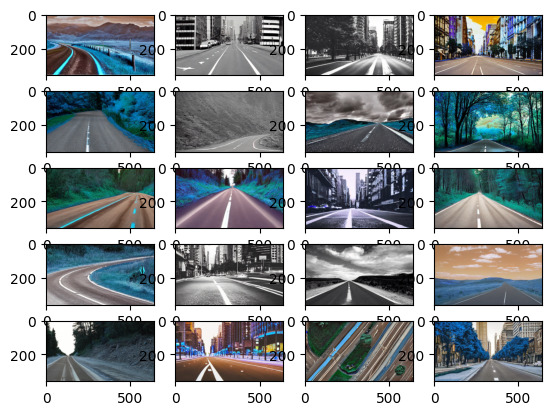

In [9]:
# Printing the first sample of the each minibatch of size 8

plt.figure(figsize = (100, 100))

f, axarr = plt.subplots(5, 4)
i = 0
j = 0

for batch in train_dataloader:
  original_image, image_name, input, target = batch
  print(image_name[0])
  axarr[i, j].imshow(original_image[0])
  j += 1
  if j%4 == 0:
    i += 1
    j = 0

plt.show()

## Copy the required files from the repository to Root

In [10]:
# Copy pretrained model from repository to root
!cp Lane-Detection-in-Autonomous-Vehicles/TwinLiteNet/pretrained/best.pth ./

# Copy pytorch Neural Net from repo to root
!cp Lane-Detection-in-Autonomous-Vehicles/TwinLiteNet/model/TwinLite.py ./

# Copy Loss function pytorch code from repo to root
!cp Lane-Detection-in-Autonomous-Vehicles/TwinLiteNet/loss.py ./

# Copy all reqired constants from repo to root
!cp Lane-Detection-in-Autonomous-Vehicles/TwinLiteNet/const.py ./

# Copy all val.py from repo to root
!cp Lane-Detection-in-Autonomous-Vehicles/TwinLiteNet/val.py ./

## Load the pretrained model

In [58]:
import TwinLite as net


model = net.TwinLiteNet()
model = torch.nn.DataParallel(model)
model = model.cuda()
model.load_state_dict(torch.load('best.pth'))

<All keys matched successfully>

## Intialize loss and optimizer.

- This is based on the original code from paper author

In [59]:
"""
This script sets up the optimizer and loss function for a machine learning model used in lane detection.

Modules:
    tqdm: A library for progress bars.
    TotalLoss: A custom loss function defined in the 'loss' module.

Variables:
    lr (float): Learning rate for the optimizer.
    optimizer (torch.optim.Adam): Adam optimizer initialized with model parameters, learning rate, betas, epsilon, and weight decay.
    criteria (TotalLoss): An instance of the TotalLoss class used as the loss function.
"""
from tqdm import tqdm
from loss import TotalLoss

lr = 5e-4
optimizer = torch.optim.Adam(model.parameters(), lr, (0.9, 0.999), eps=1e-08, weight_decay=5e-4)

criteria = TotalLoss()

In [60]:
args = dict()
"""
This script initializes a dictionary `args` with the following key-value pairs:
- "lr": Learning rate for the model training.
- "max_epochs": Maximum number of epochs for training, set to 10.
- "onGPU": Boolean flag indicating whether to use GPU for training, set to True.
"""
args["lr"] = lr
args["max_epochs"] = 8
args["onGPU"] = True

In [61]:
args

{'lr': 0.0005, 'max_epochs': 8, 'onGPU': True}

## Intialize Polynomial Learning Rate Scheduler

In [62]:
def poly_lr_scheduler(args, optimizer, epoch, power=2):

  """
  Adjusts the learning rate of the optimizer according to a polynomial decay schedule.

  Args:
      args (dict): A dictionary containing the initial learning rate ('lr') and the maximum number of epochs ('max_epochs').
      optimizer (torch.optim.Optimizer): The optimizer for which to adjust the learning rate.
      epoch (int): The current epoch number.
      power (int, optional): The power of the polynomial decay. Default is 2.

  Returns:
      float: The updated learning rate.
  """
  lr = round(args["lr"] * (1 - epoch / args["max_epochs"]) ** power, 8)
  for param_group in optimizer.param_groups:
      param_group['lr'] = lr

  return lr

## A trainer function for each epoch

In [63]:
def train(args, train_loader, model, criterion, optimizer, epoch):
    """
    Trains the model for one epoch.

    Args:
        args (dict): Dictionary containing training parameters, including:
            - "onGPU" (bool): Flag to indicate if training should be done on GPU.
            - "max_epochs" (int): Total number of epochs for training.
        train_loader (DataLoader): DataLoader for the training dataset.
        model (torch.nn.Module): The model to be trained.
        criterion (callable): Loss function that takes model output and target as inputs and returns the loss.
        optimizer (torch.optim.Optimizer): Optimizer for updating model parameters.
        epoch (int): Current epoch number.

    Returns:
        tuple: A tuple containing:
            - avg_train_loss (float): Average training loss over all batches.
            - last_batch_loss (float): Loss of the last batch in the epoch.
    """
    model.train()

    total_batches = len(train_loader)
    pbar = enumerate(train_loader)
    pbar = tqdm(pbar, total=total_batches, bar_format='{l_bar}{bar:10}{r_bar}')
    j = 0
    avg_train_loss = 0
    for i, (_, _, input, target) in pbar:
        if args["onGPU"] == True:
            input = input.cuda().float() / 255.0
        output = model(input)

        # target=target.cuda()
        optimizer.zero_grad()

        focal_loss,tversky_loss,loss = criterion(output,target)
        avg_train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        pbar.set_description(('%13s' * 1 + '%13.4g' * 3) %
                                     (f'{epoch}/{args["max_epochs"] - 1}', tversky_loss, focal_loss, loss.item()))
        j += 1
    return avg_train_loss/j, loss.item()

## Train the model with custom data and also print the loss

- This loss is based on the paper

In [64]:
print("------------------------------------------")
"""
This script trains a machine learning model for lane detection using a specified number of epochs.
It prints the learning rate, average training loss, average validation loss, and the loss for the last batch of both training and validation for each epoch.

Variables:
    training_loss_last_batch (list): Stores the training loss for the last batch of each epoch.
    validation_loss_last_batch (list): Stores the validation loss for the last batch of each epoch.

Functions:
    poly_lr_scheduler(args, optimizer, epoch): Adjusts the learning rate according to a polynomial schedule.
    train(args, train_dataloader, model, criteria, optimizer, epoch): Trains the model for one epoch and returns the average training loss and the loss for the last batch.

Arguments:
    args (dict): Dictionary containing training parameters such as 'max_epochs' and 'onGPU'.
    optimizer (Optimizer): The optimizer used for training the model.
    model (nn.Module): The machine learning model to be trained.
    criteria (function): The loss function used to calculate the training and validation loss.
    train_dataloader (DataLoader): DataLoader for the training dataset.
    val_dataloader (DataLoader): DataLoader for the validation dataset.

Outputs:
    Prints the following information for each epoch:
        - Current epoch number and total number of epochs.
        - Current learning rate.
        - Average training loss.
        - Average validation loss.
        - Training loss for the last batch.
        - Validation loss for the last batch.
"""
training_loss_last_batch = []
validation_loss_last_batch = []
for epoch in range(0, args["max_epochs"]):
    print(f"Epoch: {epoch + 1}/{args['max_epochs']}")
    poly_lr_scheduler(args, optimizer, epoch)
    for param_group in optimizer.param_groups:
        lr = param_group['lr']
    print("Learning rate: " +  str(lr))
    print()

    # train for one epoch
    model.train()
    avg_train_loss, loss_for_last_batch_train = train( args, train_dataloader, model, criteria, optimizer, epoch)
    model.eval()

    avg_val_loss = 0
    i = 0
    for batch in val_dataloader:
        _, _, input, target = batch
        if args["onGPU"] == True:
            input = input.cuda().float() / 255.0
        output = model(input)
        focal_loss, tversky_loss, loss = criteria(output, target)
        avg_val_loss += loss.item()
        i += 1

    print()
    print(f"Average Training Loss: {avg_train_loss}")
    print(f"Average Validation Loss: {avg_val_loss/i}")
    print()
    print(f"Training loss for last batch: {loss_for_last_batch_train}")
    print(f"Validation loss for last batch: {loss.item()}")
    print("------------------------------------------")
    training_loss_last_batch.append(loss_for_last_batch_train)
    validation_loss_last_batch.append(loss.item())


------------------------------------------
Epoch: 1/8
Learning rate: 0.0005



          0/7       0.1372      0.06167       0.1989: 100%|██████████| 20/20 [00:09<00:00,  2.18it/s]



Average Training Loss: 0.38861471489071847
Average Validation Loss: 0.2247482438882192

Training loss for last batch: 0.19885262846946716
Validation loss for last batch: 0.14358219504356384
------------------------------------------
Epoch: 2/8
Learning rate: 0.00038281



          1/7       0.1824       0.1119       0.2944: 100%|██████████| 20/20 [00:08<00:00,  2.25it/s]



Average Training Loss: 0.2593916952610016
Average Validation Loss: 0.2373147259155909

Training loss for last batch: 0.29437902569770813
Validation loss for last batch: 0.20973709225654602
------------------------------------------
Epoch: 3/8
Learning rate: 0.00028125



          2/7      0.08388      0.04808        0.132: 100%|██████████| 20/20 [00:08<00:00,  2.26it/s]



Average Training Loss: 0.20364922508597375
Average Validation Loss: 0.22608820100625357

Training loss for last batch: 0.13196119666099548
Validation loss for last batch: 0.22651465237140656
------------------------------------------
Epoch: 4/8
Learning rate: 0.00019531



          3/7      0.07933      0.04183       0.1212: 100%|██████████| 20/20 [00:09<00:00,  2.14it/s]



Average Training Loss: 0.1750429518520832
Average Validation Loss: 0.19051417211691538

Training loss for last batch: 0.12115904688835144
Validation loss for last batch: 0.14840282499790192
------------------------------------------
Epoch: 5/8
Learning rate: 0.000125



          4/7      0.08134      0.05141       0.1327: 100%|██████████| 20/20 [00:09<00:00,  2.17it/s]



Average Training Loss: 0.1800894510000944
Average Validation Loss: 0.1898707002401352

Training loss for last batch: 0.13274326920509338
Validation loss for last batch: 0.14768780767917633
------------------------------------------
Epoch: 6/8
Learning rate: 7.031e-05



          5/7       0.1606      0.06725       0.2278: 100%|██████████| 20/20 [00:09<00:00,  2.21it/s]



Average Training Loss: 0.1754017159342766
Average Validation Loss: 0.20520263413588205

Training loss for last batch: 0.22781458497047424
Validation loss for last batch: 0.23960284888744354
------------------------------------------
Epoch: 7/8
Learning rate: 3.125e-05



          6/7      0.06589      0.02985      0.09574: 100%|██████████| 20/20 [00:08<00:00,  2.32it/s]



Average Training Loss: 0.16675316393375397
Average Validation Loss: 0.18311657011508942

Training loss for last batch: 0.09573625773191452
Validation loss for last batch: 0.18923169374465942
------------------------------------------
Epoch: 8/8
Learning rate: 7.81e-06



          7/7      0.05676      0.03421      0.09096: 100%|██████████| 20/20 [00:09<00:00,  2.15it/s]



Average Training Loss: 0.1623403411358595
Average Validation Loss: 0.16960123678048453

Training loss for last batch: 0.09096397459506989
Validation loss for last batch: 0.13377436995506287
------------------------------------------


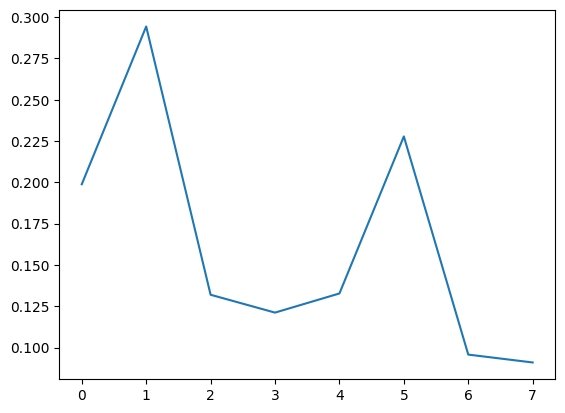

In [65]:
%matplotlib inline
"""
visualizes the training loss of the last batch using a line plot.

Modules:
    - matplotlib.pyplot: Used for plotting the training loss.

Variables:
    - x (list): A list of indices corresponding to the length of `training_loss_last_batch`.
    - y (list): The training loss values of the last batch.

Usage:
    Ensure that `training_loss_last_batch` is defined and contains the training loss values before running this script.
"""
import matplotlib.pyplot as plt

x = list(range(len(training_loss_last_batch)))
y = training_loss_last_batch

plt.plot(x, y)

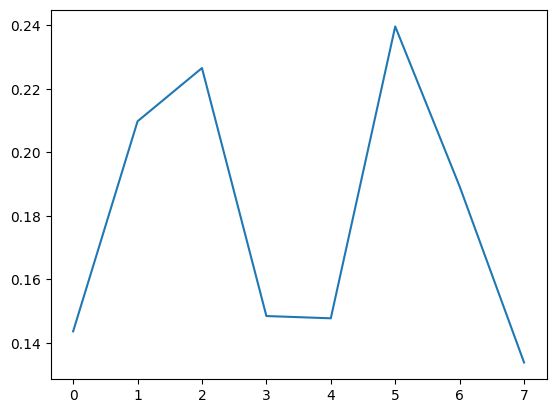

In [66]:
%matplotlib inline
"""
This script plots the validation loss from the last batch of a machine learning model training process.

Modules:
    - matplotlib.pyplot: Used for plotting the validation loss.

Variables:
    - validation_loss_last_batch (list): A list containing the validation loss values from the last batch.

Plot:
    - x: A list of indices corresponding to the length of `validation_loss_last_batch`.
    - y: The validation loss values from the last batch.

The plot displays the validation loss over the indices of the last batch.
"""
import matplotlib.pyplot as plt

x = list(range(len(validation_loss_last_batch)))
y = validation_loss_last_batch

plt.plot(x, y)

## Calculating loss on Test data

In [67]:
"""
This script evaluates the performance of a lane detection model on a test dataset.

Variables:
- avg_test_loss (float): Accumulates the total loss over all batches.
- i (int): Counter for the number of batches processed.
- batch (tuple): A batch of data from the test dataloader.
- input (Tensor): The input data for the model.
- target (Tensor): The ground truth labels for the input data.
- output (Tensor): The model's predictions for the input data.
- focal_loss (Tensor): The focal loss computed for the batch.
- tversky_loss (Tensor): The Tversky loss computed for the batch.
- loss (Tensor): The total loss computed for the batch.

Prints:
- The average testing loss over all batches.
- The testing loss for the last batch.
"""
avg_test_loss = 0
i = 0
for batch in test_dataloader:
    _, _, input, target = batch
    if args["onGPU"] == True:
        input = input.cuda().float() / 255.0
    output = model(input)
    focal_loss, tversky_loss, loss = criteria(output, target)
    avg_test_loss += loss.item()
    i += 1

print("------------------------------------------")
print(f"Average Testing Loss: {avg_test_loss/i}")
print(f"Testing loss for last batch: {loss.item()}")
print("------------------------------------------")

------------------------------------------
Average Testing Loss: 0.23580509424209595
Testing loss for last batch: 0.14880989491939545
------------------------------------------


# Defining functions to calculate Pixel Accuracy and Intersection of Union

In [68]:
class SegmentationMetric(object):
    """
    SegmentationMetric is a class for evaluating the performance of a segmentation model using various metrics.
    Attributes:
        numClass (int): Number of classes in the segmentation task.
        confusionMatrix (np.ndarray): Confusion matrix to store the counts of true positives, false positives, true negatives, and false negatives.
    Methods:
        __init__(numClass):
            Initializes the SegmentationMetric with the number of classes.
        pixelAccuracy():
            Computes the overall pixel accuracy across all classes.
            Returns:
                float: Overall pixel accuracy.
        classPixelAccuracy():
            Computes the pixel accuracy (precision) for each class.
            Returns:
                np.ndarray: Pixel accuracy for each class.
        meanPixelAccuracy():
            Computes the mean pixel accuracy across all classes.
            Returns:
                float: Mean pixel accuracy.
        meanIntersectionOverUnion():
            Computes the mean Intersection over Union (IoU) across all classes.
            Returns:
                float: Mean IoU.
        IntersectionOverUnion():
            Computes the Intersection over Union (IoU) for the second class.
            Returns:
                float: IoU for the second class.
        genConfusionMatrix(imgPredict, imgLabel):
            Generates the confusion matrix from the predicted and ground truth labels.
            Args:
                imgPredict (np.ndarray): Predicted labels.
                imgLabel (np.ndarray): Ground truth labels.
            Returns:
                np.ndarray: Generated confusion matrix.
        Frequency_Weighted_Intersection_over_Union():
            Computes the Frequency Weighted Intersection over Union (FWIoU).
            Returns:
                float: FWIoU.
        addBatch(imgPredict, imgLabel):
            Adds a batch of predicted and ground truth labels to the confusion matrix.
            Args:
                imgPredict (np.ndarray): Predicted labels.
                imgLabel (np.ndarray): Ground truth labels.
        reset():
            Resets the confusion matrix to zeros.
    """
    def __init__(self, numClass):
        self.numClass = numClass
        self.confusionMatrix = np.zeros((self.numClass,)*2)

    def pixelAccuracy(self):
        # return all class overall pixel accuracy
        # acc = (TP + TN) / (TP + TN + FP + TN)
        acc = np.diag(self.confusionMatrix).sum() /  self.confusionMatrix.sum()
        return acc


    def classPixelAccuracy(self):
        # return each category pixel accuracy(A more accurate way to call it precision)
        # acc = (TP) / TP + FP
        classAcc = np.diag(self.confusionMatrix) / (self.confusionMatrix.sum(axis=0) + 1e-12)
        return classAcc

    def meanPixelAccuracy(self):
        classAcc = self.classPixelAccuracy()
        meanAcc = np.nanmean(classAcc)
        return meanAcc

    def meanIntersectionOverUnion(self):
        # Intersection = TP Union = TP + FP + FN
        # IoU = TP / (TP + FP + FN)
        intersection = np.diag(self.confusionMatrix)
        union = np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) - np.diag(self.confusionMatrix)
        IoU = intersection / union
        IoU[np.isnan(IoU)] = 0
        mIoU = np.nanmean(IoU)
        return mIoU

    def IntersectionOverUnion(self):
        intersection = np.diag(self.confusionMatrix)
        union = np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) - np.diag(self.confusionMatrix)
        IoU = intersection / union
        IoU[np.isnan(IoU)] = 0
        return IoU[1]

    def genConfusionMatrix(self, imgPredict, imgLabel):
        # remove classes from unlabeled pixels in gt image and predict
        # print(imgLabel.shape)
        mask = (imgLabel >= 0) & (imgLabel < self.numClass)
        label = self.numClass * imgLabel[mask] + imgPredict[mask]
        count = np.bincount(label, minlength=self.numClass**2)
        confusionMatrix = count.reshape(self.numClass, self.numClass)
        return confusionMatrix

    def Frequency_Weighted_Intersection_over_Union(self):
        # FWIOU =     [(TP+FN)/(TP+FP+TN+FN)] *[TP / (TP + FP + FN)]
        freq = np.sum(self.confusionMatrix, axis=1) / np.sum(self.confusionMatrix)
        iu = np.diag(self.confusionMatrix) / (
                np.sum(self.confusionMatrix, axis=1) + np.sum(self.confusionMatrix, axis=0) -
                np.diag(self.confusionMatrix))
        FWIoU = (freq[freq > 0] * iu[freq > 0]).sum()
        return FWIoU


    def addBatch(self, imgPredict, imgLabel):
        assert imgPredict.shape == imgLabel.shape
        self.confusionMatrix += self.genConfusionMatrix(imgPredict, imgLabel)

    def reset(self):
        self.confusionMatrix = np.zeros((self.numClass, self.numClass))

In [69]:
class AverageMeter(object):
    """
    Computes and stores the average and current value.

    Methods
    -------
    __init__():
        Initializes the AverageMeter and resets its values.

    reset():
        Resets all the values (val, avg, sum, count) to zero.

    update(val, n=1):
        Updates the meter with a new value.

        Parameters
        ----------
        val : float
            The new value to be added.
        n : int, optional
            The number of occurrences of the value (default is 1).
    """
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count if self.count != 0 else 0

In [70]:
@torch.no_grad()
def val(val_loader, model):
    """

    Validate the model on the validation dataset.

    Args:
        val_loader (DataLoader): DataLoader for the validation dataset.
        model (torch.nn.Module): The model to be validated.

    Returns:
        tuple: A tuple containing two tuples:
            - da_segment_result (tuple): Contains the accuracy, IoU, and mean IoU for the DA segmentation.
            - ll_segment_result (tuple): Contains the accuracy, IoU, and mean IoU for the LL segmentation.

    Note:
        This function uses the SegmentationMetric class to compute the segmentation metrics.
        It also uses the AverageMeter class to keep track of the average values of the metrics.
    """
    model.eval()

    DA=SegmentationMetric(2)
    LL=SegmentationMetric(2)

    da_acc_seg = AverageMeter()
    da_IoU_seg = AverageMeter()
    da_mIoU_seg = AverageMeter()

    ll_acc_seg = AverageMeter()
    ll_IoU_seg = AverageMeter()
    ll_mIoU_seg = AverageMeter()
    total_batches = len(val_loader)

    total_batches = len(val_loader)
    pbar = enumerate(val_loader)
    pbar = tqdm(pbar, total=total_batches)
    for i, (_, _,input, target) in pbar:
        input = input.cuda().float() / 255.0
            # target = target.cuda()

        input_var = input
        target_var = target

        # run the mdoel
        with torch.no_grad():
            output = model(input_var)

        out_da,out_ll=output
        target_da,target_ll=target

        _,da_predict=torch.max(out_da, 1)
        _,da_gt=torch.max(target_da, 1)

        _,ll_predict=torch.max(out_ll, 1)
        _,ll_gt=torch.max(target_ll, 1)
        DA.reset()
        DA.addBatch(da_predict.cpu(), da_gt.cpu())


        da_acc = DA.pixelAccuracy()
        da_IoU = DA.IntersectionOverUnion()
        da_mIoU = DA.meanIntersectionOverUnion()

        da_acc_seg.update(da_acc,input.size(0))
        da_IoU_seg.update(da_IoU,input.size(0))
        da_mIoU_seg.update(da_mIoU,input.size(0))


        LL.reset()
        LL.addBatch(ll_predict.cpu(), ll_gt.cpu())


        ll_acc = LL.pixelAccuracy()
        ll_IoU = LL.IntersectionOverUnion()
        ll_mIoU = LL.meanIntersectionOverUnion()

        ll_acc_seg.update(ll_acc,input.size(0))
        ll_IoU_seg.update(ll_IoU,input.size(0))
        ll_mIoU_seg.update(ll_mIoU,input.size(0))

    da_segment_result = (da_acc_seg.avg,da_IoU_seg.avg,da_mIoU_seg.avg)
    ll_segment_result = (ll_acc_seg.avg,ll_IoU_seg.avg,ll_mIoU_seg.avg)
    return da_segment_result,ll_segment_result

# Evaluating metrics

In [71]:
model.eval()
"""
Evaluates the model and prints segmentation results.

This script performs the following steps:
1. Sets the model to evaluation mode.
2. Creates a random tensor example and moves it to the GPU.
3. Traces the model with the example tensor using TorchScript.
4. Evaluates the model on the test dataloader.
5. Formats and prints the segmentation results for driving area and lane line.

Variables:
    model (torch.nn.Module): The neural network model to be evaluated.
    example (torch.Tensor): A random tensor example for tracing the model.
    da_segment_results (tuple): Results of the driving area segmentation (accuracy, IOU, mIOU).
    ll_segment_results (tuple): Results of the lane line segmentation (accuracy, IOU, mIOU).
    msg (str): Formatted string containing the segmentation results.

Returns:
    None
"""
example = torch.rand(1, 3, 360, 640).cuda()
model = torch.jit.trace(model, example)
da_segment_results,ll_segment_results = val(test_dataloader, model)

msg =  'Driving area Segment: Acc({da_seg_acc:.3f})    IOU ({da_seg_iou:.3f})    mIOU({da_seg_miou:.3f})\n' \
                    'Lane line Segment: Acc({ll_seg_acc:.3f})    IOU ({ll_seg_iou:.3f})  mIOU({ll_seg_miou:.3f})'.format(
                        da_seg_acc=da_segment_results[0],da_seg_iou=da_segment_results[1],da_seg_miou=da_segment_results[2],
                        ll_seg_acc=ll_segment_results[0],ll_seg_iou=ll_segment_results[1],ll_seg_miou=ll_segment_results[2])

100%|██████████| 3/3 [00:05<00:00,  1.84s/it]


In [72]:
print(msg)

Driving area Segment: Acc(0.961)    IOU (0.767)    mIOU(0.861)
Lane line Segment: Acc(0.984)    IOU (0.203)  mIOU(0.593)


# Metrics

- Evaluation metrics are pixel accuracy and IoU(Intersection over Union).
- We have achieved an accuracy of 95.9% for Driving area segment
- We have achieved an accuracy of 98.4% for Lane Line segment.
- An average of 97.15 % pixel accuracy is achieved which is comparable to the original model's accuracy.

# Saving the model

In [73]:
torch.save(model.state_dict(), "fine-tuned-model.pth")

In [74]:
model = net.TwinLiteNet()
model = torch.nn.DataParallel(model)
model = model.cuda()
model.load_state_dict(torch.load('fine-tuned-model.pth'))

<All keys matched successfully>

In [75]:
import torch
import numpy as np
import shutil
from tqdm.autonotebook import tqdm
import os
import os
import torch
import TwinLite as net


model = net.TwinLiteNet()
import cv2

def Run(model,img):
    img = cv2.resize(img, (640, 360))
    img_rs=img.copy()

    img = img[:, :, ::-1].transpose(2, 0, 1)
    img = np.ascontiguousarray(img)
    img=torch.from_numpy(img)
    img = torch.unsqueeze(img, 0)  # add a batch dimension
    img=img.cuda().float() / 255.0
    img = img.cuda()
    with torch.no_grad():
        img_out = model(img)
    x0=img_out[0]
    x1=img_out[1]

    _,da_predict=torch.max(x0, 1)
    _,ll_predict=torch.max(x1, 1)

    DA = da_predict.byte().cpu().data.numpy()[0]*255
    LL = ll_predict.byte().cpu().data.numpy()[0]*255
    img_rs[DA>100]=[255,0,0]
    img_rs[LL>100]=[0,255,0]

    return img_rs


model = net.TwinLiteNet()
model = torch.nn.DataParallel(model)
model = model.cuda()
model.load_state_dict(torch.load('fine-tuned-model.pth'))
model.eval()

img = cv2.imread("dataset/test/images/road_image_170.png")
img = Run(model, img)
cv2.imwrite("sample.png", img)

True

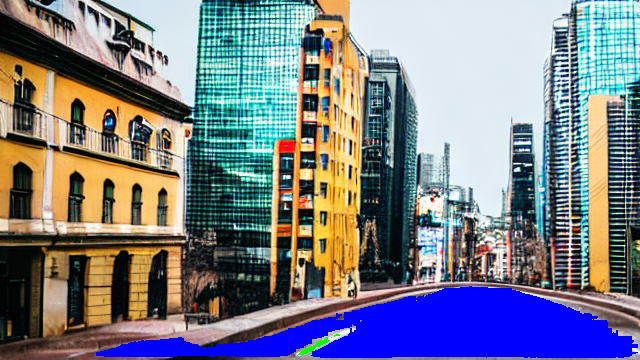

In [76]:
from PIL import Image


# Blue area is drivable area, green lines are lanes
Image.open("sample.png")

In [1]:
# prompt: make a directory/folder called processed_frames
!mkdir processed_frames

## Realtime lane detection from a video input
The provided code reads frames from a video file using OpenCV, processes each frame with a machine learning model, and writes the processed frames to a new video file. It initializes the video writer with the same frame width, height, and frames per second (fps) as the input video. Additionally, it optionally displays every 100th processed frame for verification using

Video opened successfully.
Processing frame 1
Processing frame 2
Processing frame 3
Processing frame 4
Processing frame 5
Processing frame 6
Processing frame 7
Processing frame 8
Processing frame 9
Processing frame 10
Processing frame 11
Processing frame 12
Processing frame 13
Processing frame 14
Processing frame 15
Processing frame 16
Processing frame 17
Processing frame 18
Processing frame 19
Processing frame 20
Processing frame 21
Processing frame 22
Processing frame 23
Processing frame 24
Processing frame 25
Processing frame 26
Processing frame 27
Processing frame 28
Processing frame 29
Processing frame 30
Processing frame 31
Processing frame 32
Processing frame 33
Processing frame 34
Processing frame 35
Processing frame 36
Processing frame 37
Processing frame 38
Processing frame 39
Processing frame 40
Processing frame 41
Processing frame 42
Processing frame 43
Processing frame 44
Processing frame 45
Processing frame 46
Processing frame 47
Processing frame 48
Processing frame 49
Pr

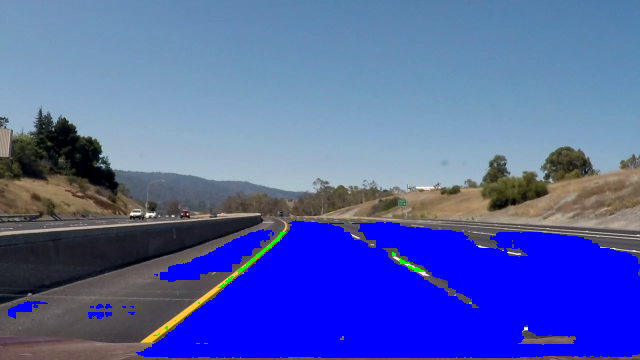

Processing frame 101
Processing frame 102
Processing frame 103
Processing frame 104
Processing frame 105
Processing frame 106
Processing frame 107
Processing frame 108
Processing frame 109
Processing frame 110
Processing frame 111
Processing frame 112
Processing frame 113
Processing frame 114
Processing frame 115
Processing frame 116
Processing frame 117
Processing frame 118
Processing frame 119
Processing frame 120
Processing frame 121
Processing frame 122
Processing frame 123
Processing frame 124
Processing frame 125
Processing frame 126
Processing frame 127
Processing frame 128
Processing frame 129
Processing frame 130
Processing frame 131
Processing frame 132
Processing frame 133
Processing frame 134
Processing frame 135
Processing frame 136
Processing frame 137
Processing frame 138
Processing frame 139
Processing frame 140
Processing frame 141
Processing frame 142
Processing frame 143
Processing frame 144
Processing frame 145
Processing frame 146
Processing frame 147
Processing fr

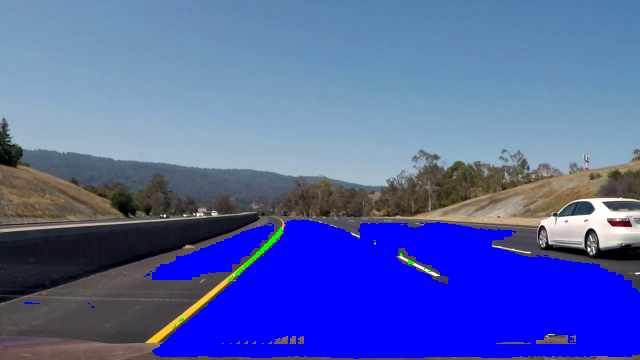

Processing frame 201
Processing frame 202
Processing frame 203
Processing frame 204
Processing frame 205
Processing frame 206
Processing frame 207
Processing frame 208
Processing frame 209
Processing frame 210
Processing frame 211
Processing frame 212
Processing frame 213
Processing frame 214
Processing frame 215
Processing frame 216
Processing frame 217
Processing frame 218
Processing frame 219
Processing frame 220
Processing frame 221
Processing frame 222
Processing frame 223
Processing frame 224
Processing frame 225
Processing frame 226
Processing frame 227
Processing frame 228
Processing frame 229
Processing frame 230
Processing frame 231
Processing frame 232
Processing frame 233
Processing frame 234
Processing frame 235
Processing frame 236
Processing frame 237
Processing frame 238
Processing frame 239
Processing frame 240
Processing frame 241
Processing frame 242
Processing frame 243
Processing frame 244
Processing frame 245
Processing frame 246
Processing frame 247
Processing fr

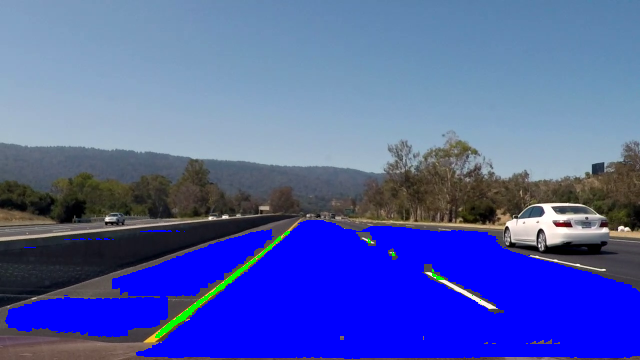

Processing frame 301
Processing frame 302
Processing frame 303
Processing frame 304
Processing frame 305
Processing frame 306
Processing frame 307
Processing frame 308
Processing frame 309
Processing frame 310
Processing frame 311
Processing frame 312
Processing frame 313
Processing frame 314
Processing frame 315
Processing frame 316
Processing frame 317
Processing frame 318
Processing frame 319
Processing frame 320
Processing frame 321
Processing frame 322
Processing frame 323
Processing frame 324
Processing frame 325
Processing frame 326
Processing frame 327
Processing frame 328
Processing frame 329
Processing frame 330
Processing frame 331
Processing frame 332
Processing frame 333
Processing frame 334
Processing frame 335
Processing frame 336
Processing frame 337
Processing frame 338
Processing frame 339
Processing frame 340
Processing frame 341
Processing frame 342
Processing frame 343
Processing frame 344
Processing frame 345
Processing frame 346
Processing frame 347
Processing fr

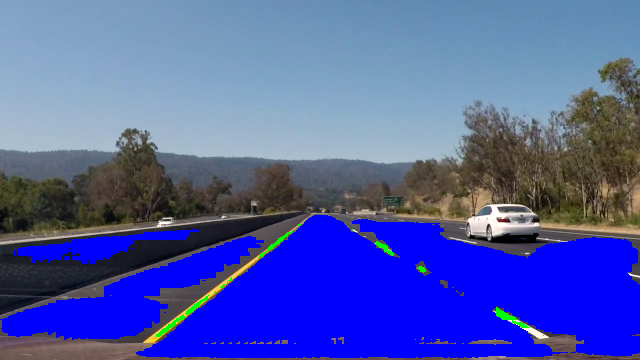

Processing frame 401
Processing frame 402
Processing frame 403
Processing frame 404
Processing frame 405
Processing frame 406
Processing frame 407
Processing frame 408
Processing frame 409
Processing frame 410
Processing frame 411
Processing frame 412
Processing frame 413
Processing frame 414
Processing frame 415
Processing frame 416
Processing frame 417
Processing frame 418
Processing frame 419
Processing frame 420
Processing frame 421
Processing frame 422
Processing frame 423
Processing frame 424
Processing frame 425
Processing frame 426
Processing frame 427
Processing frame 428
Processing frame 429
Processing frame 430
Processing frame 431
Processing frame 432
Processing frame 433
Processing frame 434
Processing frame 435
Processing frame 436
Processing frame 437
Processing frame 438
Processing frame 439
Processing frame 440
Processing frame 441
Processing frame 442
Processing frame 443
Processing frame 444
Processing frame 445
Processing frame 446
Processing frame 447
Processing fr

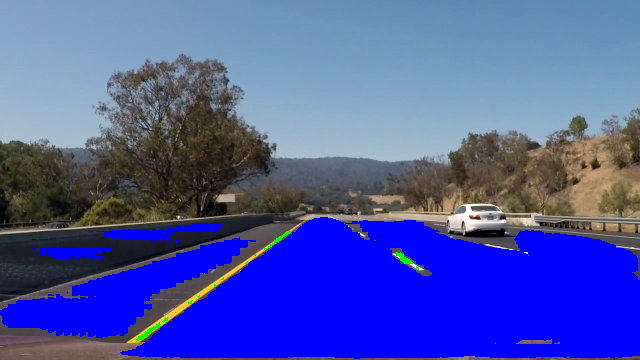

Processing frame 501
Processing frame 502
Processing frame 503
Processing frame 504
Processing frame 505
Processing frame 506
Processing frame 507
Processing frame 508
Processing frame 509
Processing frame 510
Processing frame 511
Processing frame 512
Processing frame 513
Processing frame 514
Processing frame 515
Processing frame 516
Processing frame 517
Processing frame 518
Processing frame 519
Processing frame 520
Processing frame 521
Processing frame 522
Processing frame 523
Processing frame 524
Processing frame 525
Processing frame 526
Processing frame 527
Processing frame 528
Processing frame 529
Processing frame 530
Processing frame 531
Processing frame 532
Processing frame 533
Processing frame 534
Processing frame 535
Processing frame 536
Processing frame 537
Processing frame 538
Processing frame 539
Processing frame 540
Processing frame 541
Processing frame 542
Processing frame 543
Processing frame 544
Processing frame 545
Processing frame 546
Processing frame 547
Processing fr

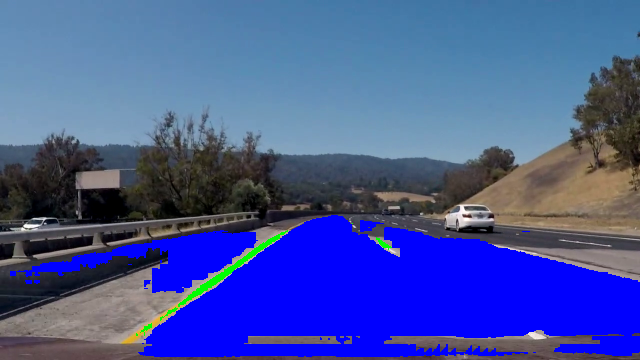

Processing frame 601
Processing frame 602
Processing frame 603
Processing frame 604
Processing frame 605
Processing frame 606
Processing frame 607
Processing frame 608
Processing frame 609
Processing frame 610
Processing frame 611
Processing frame 612
Processing frame 613
Processing frame 614
Processing frame 615
Processing frame 616
Processing frame 617
Processing frame 618
Processing frame 619
Processing frame 620
Processing frame 621
Processing frame 622
Processing frame 623
Processing frame 624
Processing frame 625
Processing frame 626
Processing frame 627
Processing frame 628
Processing frame 629
Processing frame 630
Processing frame 631
Processing frame 632
Processing frame 633
Processing frame 634
Processing frame 635
Processing frame 636
Processing frame 637
Processing frame 638
Processing frame 639
Processing frame 640
Processing frame 641
Processing frame 642
Processing frame 643
Processing frame 644
Processing frame 645
Processing frame 646
Processing frame 647
Processing fr

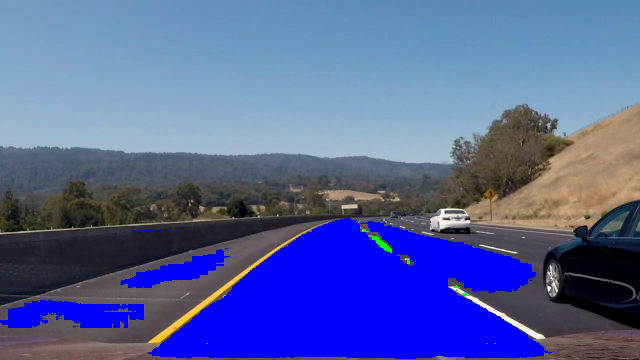

Processing frame 701
Processing frame 702
Processing frame 703
Processing frame 704
Processing frame 705
Processing frame 706
Processing frame 707
Processing frame 708
Processing frame 709
Processing frame 710
Processing frame 711
Processing frame 712
Processing frame 713
Processing frame 714
Processing frame 715
Processing frame 716
Processing frame 717
Processing frame 718
Processing frame 719
Processing frame 720
Processing frame 721
Processing frame 722
Processing frame 723
Processing frame 724
Processing frame 725
Processing frame 726
Processing frame 727
Processing frame 728
Processing frame 729
Processing frame 730
Processing frame 731
Processing frame 732
Processing frame 733
Processing frame 734
Processing frame 735
Processing frame 736
Processing frame 737
Processing frame 738
Processing frame 739
Processing frame 740
Processing frame 741
Processing frame 742
Processing frame 743
Processing frame 744
Processing frame 745
Processing frame 746
Processing frame 747
Processing fr

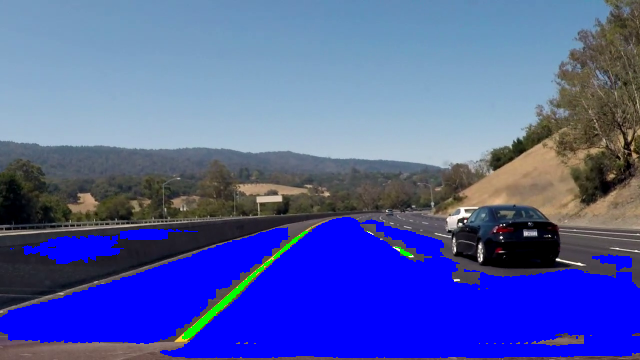

Processing frame 801
Processing frame 802
Processing frame 803
Processing frame 804
Processing frame 805
Processing frame 806
Processing frame 807
Processing frame 808
Processing frame 809
Processing frame 810
Processing frame 811
Processing frame 812
Processing frame 813
Processing frame 814
Processing frame 815
Processing frame 816
Processing frame 817
Processing frame 818
Processing frame 819
Processing frame 820
Processing frame 821
Processing frame 822
Processing frame 823
Processing frame 824
Processing frame 825
Processing frame 826
Processing frame 827
Processing frame 828
Processing frame 829
Processing frame 830
Processing frame 831
Processing frame 832
Processing frame 833
Processing frame 834
Processing frame 835
Processing frame 836
Processing frame 837
Processing frame 838
Processing frame 839
Processing frame 840
Processing frame 841
Processing frame 842
Processing frame 843
Processing frame 844
Processing frame 845
Processing frame 846
Processing frame 847
Processing fr

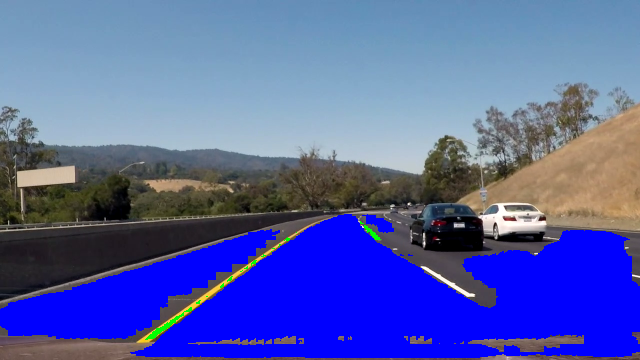

Processing frame 901
Processing frame 902
Processing frame 903
Processing frame 904
Processing frame 905
Processing frame 906
Processing frame 907
Processing frame 908
Processing frame 909
Processing frame 910
Processing frame 911
Processing frame 912
Processing frame 913
Processing frame 914
Processing frame 915
Processing frame 916
Processing frame 917
Processing frame 918
Processing frame 919
Processing frame 920
Processing frame 921
Processing frame 922
Processing frame 923
Processing frame 924
Processing frame 925
Processing frame 926
Processing frame 927
Processing frame 928
Processing frame 929
Processing frame 930
Processing frame 931
Processing frame 932
Processing frame 933
Processing frame 934
Processing frame 935
Processing frame 936
Processing frame 937
Processing frame 938
Processing frame 939
Processing frame 940
Processing frame 941
Processing frame 942
Processing frame 943
Processing frame 944
Processing frame 945
Processing frame 946
Processing frame 947
Processing fr

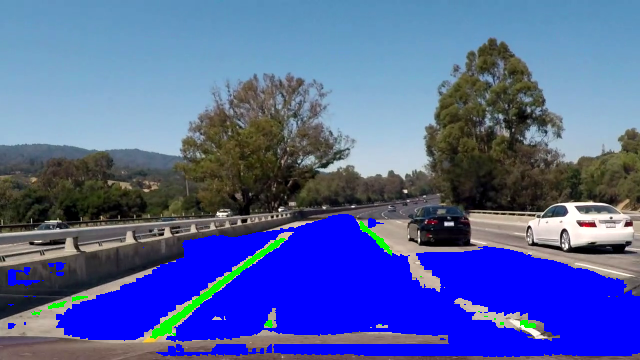

Processing frame 1001
Processing frame 1002
Processing frame 1003
Processing frame 1004
Processing frame 1005
Processing frame 1006
Processing frame 1007
Processing frame 1008
Processing frame 1009
Processing frame 1010
Processing frame 1011
Processing frame 1012
Processing frame 1013
Processing frame 1014
Processing frame 1015
Processing frame 1016
Processing frame 1017
Processing frame 1018
Processing frame 1019
Processing frame 1020
Processing frame 1021
Processing frame 1022
Processing frame 1023
Processing frame 1024
Processing frame 1025
Processing frame 1026
Processing frame 1027
Processing frame 1028
Processing frame 1029
Processing frame 1030
Processing frame 1031
Processing frame 1032
Processing frame 1033
Processing frame 1034
Processing frame 1035
Processing frame 1036
Processing frame 1037
Processing frame 1038
Processing frame 1039
Processing frame 1040
Processing frame 1041
Processing frame 1042
Processing frame 1043
Processing frame 1044
Processing frame 1045
Processing

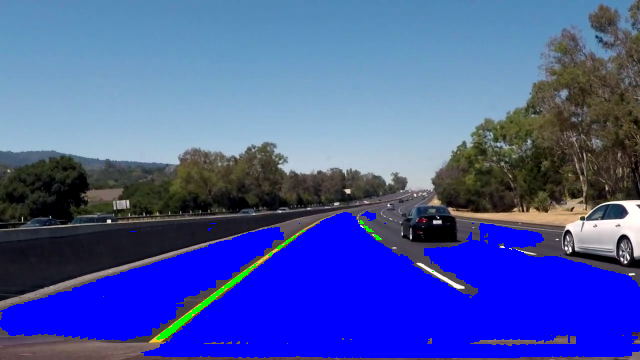

Processing frame 1101
Processing frame 1102
Processing frame 1103
Processing frame 1104
Processing frame 1105
Processing frame 1106
Processing frame 1107
Processing frame 1108
Processing frame 1109
Processing frame 1110
Processing frame 1111
Processing frame 1112
Processing frame 1113
Processing frame 1114
Processing frame 1115
Processing frame 1116
Processing frame 1117
Processing frame 1118
Processing frame 1119
Processing frame 1120
Processing frame 1121
Processing frame 1122
Processing frame 1123
Processing frame 1124
Processing frame 1125
Processing frame 1126
Processing frame 1127
Processing frame 1128
Processing frame 1129
Processing frame 1130
Processing frame 1131
Processing frame 1132
Processing frame 1133
Processing frame 1134
Processing frame 1135
Processing frame 1136
Processing frame 1137
Processing frame 1138
Processing frame 1139
Processing frame 1140
Processing frame 1141
Processing frame 1142
Processing frame 1143
Processing frame 1144
Processing frame 1145
Processing

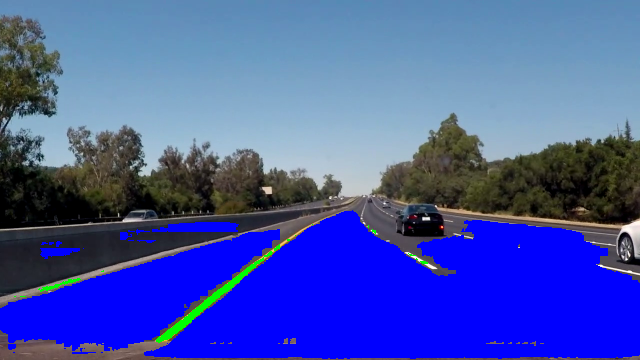

Processing frame 1201
Processing frame 1202
Processing frame 1203
Processing frame 1204
Processing frame 1205
Processing frame 1206
Processing frame 1207
Processing frame 1208
Processing frame 1209
Processing frame 1210
Processing frame 1211
Processing frame 1212
Processing frame 1213
Processing frame 1214
Processing frame 1215
Processing frame 1216
Processing frame 1217
Processing frame 1218
Processing frame 1219
Processing frame 1220
Processing frame 1221
Processing frame 1222
Processing frame 1223
Processing frame 1224
Processing frame 1225
Processing frame 1226
Processing frame 1227
Processing frame 1228
Processing frame 1229
Processing frame 1230
Processing frame 1231
Processing frame 1232
Processing frame 1233
Processing frame 1234
Processing frame 1235
Processing frame 1236
Processing frame 1237
Processing frame 1238
Processing frame 1239
Processing frame 1240
Processing frame 1241
Processing frame 1242
Processing frame 1243
Processing frame 1244
Processing frame 1245
Processing

In [2]:
import torch
import numpy as np
import cv2
import os
from google.colab.patches import cv2_imshow # Import the cv2_imshow patch from Google Colab
import TwinLite as net

# Initialize the model
model = net.TwinLiteNet()
model = torch.nn.DataParallel(model)
model = model.cuda()
model.load_state_dict(torch.load('fine-tuned-model.pth'))
model.eval()

def Run(model, img):
    img = cv2.resize(img, (640, 360))
    img_rs = img.copy()

    img = img[:, :, ::-1].transpose(2, 0, 1)
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img)
    img = torch.unsqueeze(img, 0)  # add a batch dimension
    img = img.cuda().float() / 255.0
    img = img.cuda()
    with torch.no_grad():
        img_out = model(img)
    x0 = img_out[0]
    x1 = img_out[1]

    _, da_predict = torch.max(x0, 1)
    _, ll_predict = torch.max(x1, 1)

    DA = da_predict.byte().cpu().data.numpy()[0] * 255
    LL = ll_predict.byte().cpu().data.numpy()[0] * 255
    img_rs[DA > 100] = [255, 0, 0]
    img_rs[LL > 100] = [0, 255, 0]

    return img_rs

# Read the video file
video_path = 'video_testing.mp4'
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    print("Video opened successfully.")

# Create a directory to save processed frames
output_dir = 'processed_frames'

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("End of video or error reading frame.")
        break

    frame_count += 1
    print(f"Processing frame {frame_count}")

    # Process the frame
    processed_frame = Run(model, frame)

    # Display the processed frame for verification (optional)
    if frame_count % 100 == 0:  # Display every 100th frame
        cv2_imshow(processed_frame) # Use cv2_imshow instead of cv2.imshow
        cv2.waitKey(1)  # Display the frame for 1 ms

    # Save the processed frame to the output directory
    frame_filename = os.path.join(output_dir, f'frame_{frame_count:04d}.png')
    cv2.imwrite(frame_filename, processed_frame)

# Release the video capture
cap.release()
cv2.destroyAllWindows()

print(f"Processed {frame_count} frames.")

## Combining all saved frames into a video

In [3]:
import cv2
import os

# Directory containing the processed frames
output_dir = 'processed_frames'

# Get the list of frame filenames
frame_filenames = sorted([f for f in os.listdir(output_dir) if f.endswith('.png')])

# Get the frame size from the first frame
frame = cv2.imread(os.path.join(output_dir, frame_filenames[0]))
height, width, layers = frame.shape
frame_size = (width, height)

# Define the codec and create VideoWriter object
out = cv2.VideoWriter('output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 30, frame_size)

for filename in frame_filenames:
    frame = cv2.imread(os.path.join(output_dir, filename))
    out.write(frame)

# Release the video writer
out.release()

print("Video created successfully.")

Video created successfully.
